In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import glob
from skimage.io import imread, imshow
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
train_path = r'C:\Users\agraw\Downloads\archive (1)\For use\TRAIN'
test_path = r'C:\Users\agraw\Downloads\archive (1)\For use\TEST'
val_path = r'C:\Users\agraw\Downloads\archive (1)\For use\VAL'
image_size = [512,512,3]

In [3]:


train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [4]:

training_set = train_datagen.flow_from_directory(train_path,target_size = (512,512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2341 images belonging to 2 classes.


In [5]:
test_set = test_datagen.flow_from_directory(test_path,target_size = (512,512),shuffle= False,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 2 classes.


In [6]:
val_set = train_datagen.flow_from_directory(val_path,target_size = (512,512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 240 images belonging to 2 classes.


In [7]:
vgg = tf.keras.applications.VGG16(
    input_shape= image_size,
    include_top=False,
    weights="imagenet",
)

vgg.summary()

58892288/58889256 [==============================] - 99s 2us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_____________________________________________________________

In [8]:
for layer in vgg.layers:
    layer.trainable = False

In [10]:

x = (Flatten()(vgg.output))

prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)    

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
r = model.fit(
  training_set,
  validation_data= val_set,
  epochs=5
  
)

Epoch 1/5
74/74 [==============================] - 1389s 19s/step - loss: 7.7319 - accuracy: 0.9158 - val_loss: 3.3364 - val_accuracy: 0.9708
Epoch 2/5
74/74 [==============================] - 1343s 18s/step - loss: 3.1836 - accuracy: 0.9603 - val_loss: 0.8900 - val_accuracy: 0.9833
Epoch 3/5
74/74 [==============================] - 1338s 18s/step - loss: 1.0145 - accuracy: 0.9804 - val_loss: 0.2944 - val_accuracy: 0.9875
Epoch 4/5
74/74 [==============================] - 1353s 18s/step - loss: 0.3080 - accuracy: 0.9936 - val_loss: 1.3201 - val_accuracy: 0.9833
Epoch 5/5
74/74 [==============================] - 1470s 20s/step - loss: 0.3064 - accuracy: 0.9944 - val_loss: 0.4355 - val_accuracy: 0.9958


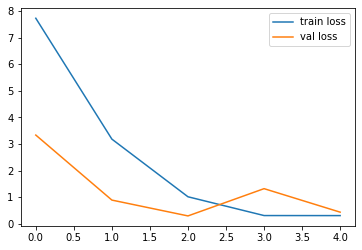

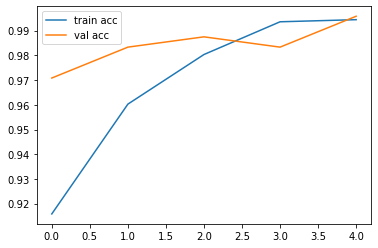

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
model.evaluate(test_set)

19/19 [==============================] - 302s 16s/step - loss: 3.8533 - accuracy: 0.9617


[3.853280782699585, 0.9616666436195374]

In [18]:
#Confution Matrix and Classification Report
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))


#print('Classification Report')
#target_names = ['Pneumonia','Non-Pneumonia']
#print(classification_report(test_set.classes, y_pred, target_names=target_names))////


Confusion Matrix
[[285  15]
 [  8 292]]


In [19]:
from sklearn.metrics import classification_report
print('Classification Report')
target_names = list(training_set.class_indices.keys())

print(classification_report(test_set.classes, y_pred, target_names=target_names))



Classification Report
              precision    recall  f1-score   support

      NORMAL       0.97      0.95      0.96       300
   PNEUMONIA       0.95      0.97      0.96       300

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

